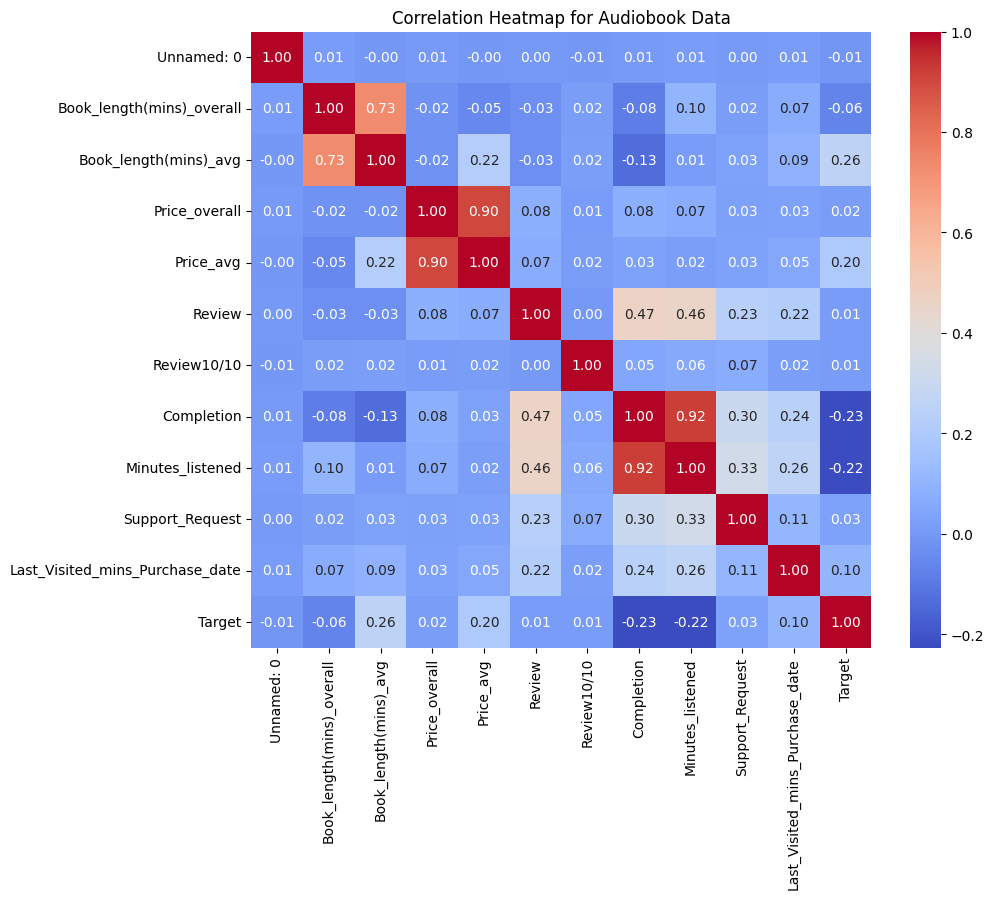

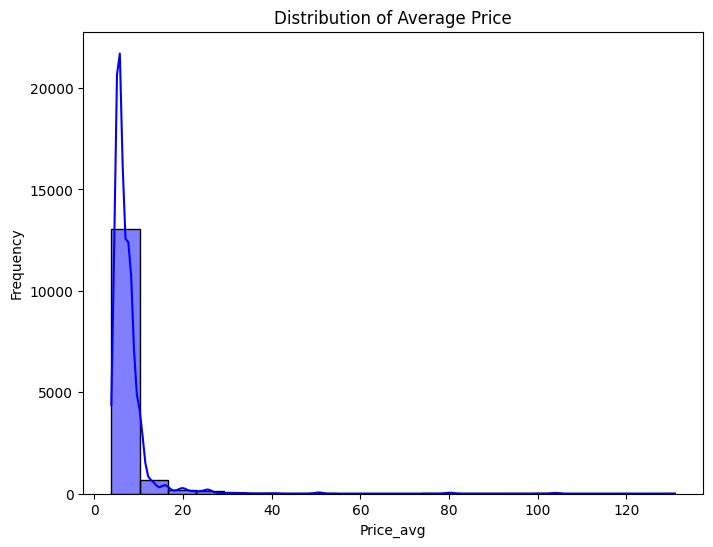

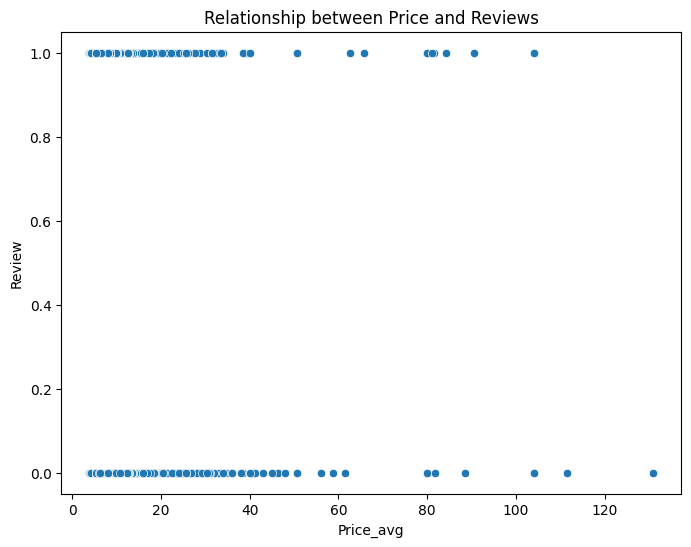

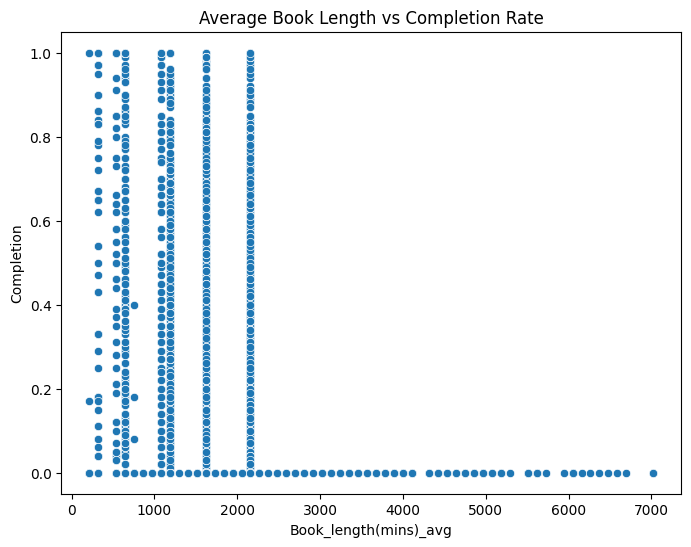

MSE: 4.453494210043325, R2: 0.8188220149447674
Weights and Biases: [{'layer': 1, 'weights': array([[-1.60028242e-001,  2.58233978e-001,  1.21019409e-001,
         3.74150187e-002, -1.74433116e-001, -3.51390767e-001,
         7.28655574e-133,  2.05199273e-001,  9.37241360e-002,
         1.55596200e-001, -6.39866314e-003,  3.19430703e-001,
         2.33027497e-001, -1.04348389e-001, -1.83295806e-001,
        -1.73063027e-001, -1.62143242e-001, -1.28657164e-002,
         8.22730687e-004, -3.08985568e-003,  4.56666392e-002,
        -1.64349673e-001, -4.20685305e-162, -2.69059088e-001,
        -2.44611209e-002,  1.54440875e-001, -1.84729740e-001,
         3.33472798e-002,  3.38955356e-002, -4.57099499e-131,
         9.19514958e-002, -2.06838559e-001, -1.25832557e-132,
         3.06225183e-001,  2.67578873e-001,  1.69245581e-001,
        -2.44195044e-003, -1.62564774e-001,  9.10727944e-002,
        -7.47127296e-002, -2.23948004e-001, -1.05574710e-002,
        -2.62848541e-001,  2.32029331e-0

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load audiobook_data_2 dataset (assuming it's a CSV file)
audiobook_data_2 = pd.read_csv('audiobook_data_2.csv')

# Function to preprocess data based on dataset structure
def preprocess_data_for_ml(df, target_column):
    # Drop missing values in the target column
    df_cleaned = df.dropna(subset=[target_column])
    
    # Encode categorical features (if needed)
    label_encoder = LabelEncoder()
    
    # For this dataset, assume relevant columns need encoding (if any)
    # Assuming 'Author' is categorical in audiobook_data_2
    if 'Author' in df_cleaned.columns:
        df_cleaned['Author'] = label_encoder.fit_transform(df_cleaned['Author'])
    
    return df_cleaned

# Preprocessing audiobook_data_2
audiobook_data_2_cleaned = preprocess_data_for_ml(audiobook_data_2, 'Price_avg')

# Insights section with charts
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(audiobook_data_2_cleaned.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap for Audiobook Data")
plt.show()

# Price distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(audiobook_data_2_cleaned['Price_avg'], bins=20, kde=True, color='blue')
plt.title("Distribution of Average Price")
plt.xlabel("Price_avg")
plt.ylabel("Frequency")
plt.show()

# Relationship between Price and Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=audiobook_data_2_cleaned, x='Price_avg', y='Review')
plt.title("Relationship between Price and Reviews")
plt.xlabel("Price_avg")
plt.ylabel("Review")
plt.show()

# Average book length vs Completion rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=audiobook_data_2_cleaned, x='Book_length(mins)_avg', y='Completion')
plt.title("Average Book Length vs Completion Rate")
plt.xlabel("Book_length(mins)_avg")
plt.ylabel("Completion")
plt.show()

# Separating features (X) and target (y)
X = audiobook_data_2_cleaned.select_dtypes(include=[float, int]).drop(columns=['Price_avg'])
y = audiobook_data_2_cleaned['Price_avg']

# Impute missing values in X using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Neural network model
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extract weights (coefficients) and biases (intercepts)
weights = model.coefs_  # List of weight matrices for each layer
biases = model.intercepts_  # List of bias vectors for each layer

# Display the weights and biases for the layers
weights_and_biases = []
for i, (w, b) in enumerate(zip(weights, biases)):
    weights_and_biases.append({"layer": i+1, "weights": w, "biases": b})

# Displaying the first layer's weights to understand feature importance
input_layer_weights = weights[0]  # Weights between input layer and first hidden layer

# Output the results
print(f"MSE: {mse}, R2: {r2}")
print("Weights and Biases:", weights_and_biases)
